In [1]:
%matplotlib inline

from __future__ import division, absolute_import, print_function

import json
import os
import copy
import random
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt

from PIL import Image, ImageOps, ImageChops
from pycocotools.coco import COCO


## Load COCO stuff information

In [2]:
stuff_json = '../tmp/instances_train2014.json'
coco = COCO(stuff_json)
# with open(stuff_json) as file:
#     coco_raw = json.load(file)

loading annotations into memory...
Done (t=13.08s)
creating index...
index created!


### Get Unique Image IDs

In [3]:
image_ids = coco.getImgIds()
len(set(image_ids))

82783

In [7]:
anno_image_ids = coco.getImgIds(catIds = [1, 2, 3, 4])
len(anno_image_ids)

151

### IDs for Images containing People

In [10]:
people_image_ids = coco.getImgIds(catIds = [1])
len(people_image_ids)

45174

### IDs for Peoplefree Images

In [11]:
people_free_ids = list(set(image_ids) - set(people_image_ids))
len(people_free_ids)

37609

## Get Annotation IDs for Image

In [24]:
# image_id = random.choice(people_free_ids)
annos_in_image = coco.getAnnIds(imgIds=image_id, iscrowd=None)
annos_in_image

[1059766, 1060893, 1562049]

## Get Annotation Masks

In [23]:
image_id = 488853

In [25]:
coco_annos = coco.loadAnns(annos_in_image)
mask = coco.annToMask(coco_annos[0])

In [26]:
masks = [coco.annToMask(a) for a in coco_annos]

In [27]:
uber_mask = np.sum(masks, axis=0)
uber_mask.shape

(241, 400)

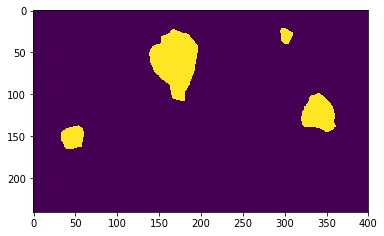

In [28]:
plt.imshow(uber_mask)
plt.show()

In [29]:
coco.loadImgs(ids=image_id)

[{'coco_url': 'http://mscoco.org/images/488853',
  'date_captured': '2013-11-19 22:01:06',
  'file_name': 'COCO_train2014_000000488853.jpg',
  'flickr_url': 'http://farm1.staticflickr.com/78/163060107_95c5c10095_z.jpg',
  'height': 241,
  'id': 488853,
  'license': 1,
  'width': 400}]

In [52]:
base_image = Image.open('../tmp/COCO_train2014_000000488853.jpg').convert('RGBA')
base_image.size

(400, 241)

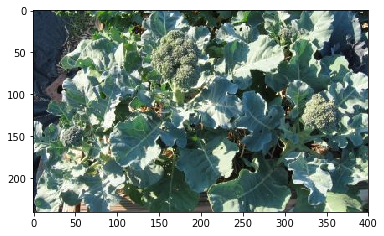

In [36]:
plt.imshow(base_image)
plt.show()

In [60]:
mask_int = (uber_mask * 255).astype(np.uint8)
mask_img = Image.fromarray(mask_int)

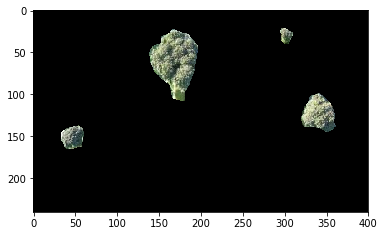

In [66]:
top_part = ImageChops.multiply(mask_img.convert('RGBA'), base_image)
plt.imshow(top_part)
plt.show()

In [48]:
base_image.size

(400, 241)